In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#1.Joint and marginal PMFs of i&j
list = [(0,0),(0,1),(1,0),(1,0),(1,1),(1,1),(1,1),(1,1)]
N = 10000
num = np.random.randint(0,8,N)
ans = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in num:
    if(list[i] == (0,0)):
        ans[0] += 1
    if(list[i] == (0,1)):
        ans[1] += 1
    if(list[i] == (1,0)):
        ans[2] += 1
    if(list[i] == (1,1)):
        ans[3] += 1
    (x,y) = list[i]
    if(x == 0):
        ans[4] += 1
    if(x == 1):
        ans[5] += 1
    if(y == 0):
        ans[6] += 1
    if(y == 1):
        ans[7] += 1
print("The calculated answer is:")
for i in range(4):
    print ("P[{}] = {}".format(list[i],ans[i]/N))
print ("P[i=0] = {}".format(ans[4]/N))
print ("P[i=1] = {}".format(ans[5]/N))
print ("P[j=0] = {}".format(ans[6]/N))
print ("P[j=1] = {}\n".format(ans[7]/N))
print("It conforms to my calculation, where:")
print ("P[(0,0)] = 0.125")
print ("P[(0,1)] = 0.125")
print ("P[(1,0)] = 0.25")
print ("P[(1,0)] = 0.50")
print ("P[i=0] = 0.25")
print ("P[i=1] = 0.75")
print ("P[j=0] = 0.375")
print ("P[j=1] = 0.625")

The calculated answer is:
P[(0, 0)] = 0.1161
P[(0, 1)] = 0.1274
P[(1, 0)] = 0.2541
P[(1, 0)] = 0.5024
P[i=0] = 0.2435
P[i=1] = 0.7565
P[j=0] = 0.3702
P[j=1] = 0.6298

It conforms to my calculation, where:
P[(0,0)] = 0.125
P[(0,1)] = 0.125
P[(1,0)] = 0.25
P[(1,0)] = 0.50
P[i=0] = 0.25
P[i=1] = 0.75
P[j=0] = 0.375
P[j=1] = 0.625


In [65]:
#2.Correlation coefficient
i0 = np.array([]);
j0 = np.array([]);
list = [(0,0),(0,1),(1,0),(1,0),(1,1),(1,1),(1,1),(1,1)]
N = 100000
num = np.random.randint(0,8,N)
for i in num:
    (xm,ym) = list[i]
    i0=np.append(i0,xm)
    j0=np.append(j0,ym)
x1 = np.mean(i0)
y1 = np.mean(j0)
x2 = np.mean(i0**2)
y2 = np.mean(j0**2)

pxy = (np.mean(i0*j0) - x1*y1)/np.sqrt((x2-x1*x1)*(y2-y1*y1)) 
print("Correlation coefficient calculated by the formula equals to {}".format(pxy))
print("True value of Correlation coefficient equals to {}".format(np.corrcoef(i0,j0)[0][1]))


Correlation coefficient calculated by the formula equals to 0.15134476158387758
True value of Correlation coefficient equals to 0.15134476158387736


      Estimation      True
k=2     0.250014  0.250000
k=3     0.249392  0.250000
k=4     0.187219  0.187500
k=5     0.125219  0.125000
k=6     0.078757  0.078125
k=7     0.046886  0.046875
k=8     0.027374  0.027344
k=9     0.015376  0.015625
k=10    0.008957  0.008789


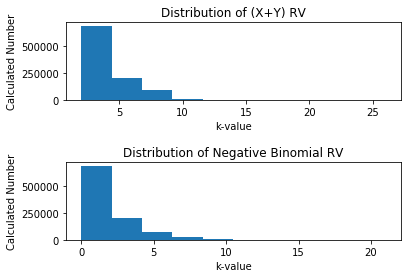

In [66]:
#3.Joint PMFs of two geometirc destributions
import math
N3 = 1000000
p = 0.5
x3 = np.random.geometric(p, size=N3)
y3 = np.random.geometric(p, size=N3)
z3 = x3 + y3
j3 = np.zeros((9,1))
for i in z3:
    for j in range(2,11):
        if(i == j):
            j3[j-2] += 1
j3 = j3/N3

Z3 = np.array([])
ZZ3 = np.random.negative_binomial(2,p,N3)
for i in range(2,11):
    a = p * p * (i - 1) * math.pow((1 - p), i - 2)
    Z3 = np.append(Z3,a)
df=pd.DataFrame(j3,columns=['Estimation'],index=['k=2','k=3','k=4','k=5','k=6',
                                              'k=7','k=8','k=9','k=10'])
df['True']=Z3
print(df)
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.hist(z3);
ax2.hist(ZZ3);
ax1.set_title('Distribution of (X+Y) RV')
ax1.set_xlabel('k-value')
ax1.set_ylabel('Calculated Number')
ax2.set_title('Distribution of Negative Binomial RV')
ax2.set_xlabel('k-value')
ax2.set_ylabel('Calculated Number')
plt.subplots_adjust(hspace=0.8)
plt.show()

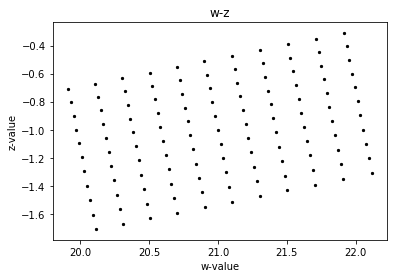

From the figure, we can estimate S(w-z) is roughly 2.04 by 1
S(w-z) = 2.04
S(x-y) = 0.01
Ratio is 204.0
It equals to Jacobian factor, which is 208 when x = 1, y = 2.


In [77]:
#4.Estimation of Jacobian Factor
from matplotlib import pyplot as plt
#prepare the data
x4 = np.linspace(0.95,1.05,11)
y4 = np.linspace(1.95,2.05,11)
X4,Y4 = np.meshgrid(x4,y4)
W4 = X4**2 + 5 * (Y4**2)
Z4 = -5*(X4**2) + Y4**2

#begin drawing
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('w-z')
ax1.set_xlabel('w-value')
ax1.set_ylabel('z-value')
ax1.scatter(W4, Z4, s=20, c='k', marker='.')
plt.show()
print("From the figure, we can estimate S(w-z) is roughly 2.04"
      " by 1\nS(w-z) = {}\nS(x-y) = {}\nRatio is {}".format(2.04,0.01,2.04/0.01))
print("It equals to Jacobian factor, which is 208 when x = 1, y = 2.")

It coverages to 1.0


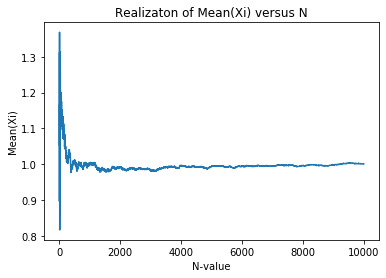

In [18]:
#5. Mean of normal distribution
N5 = 10000
Width = np.linspace(1,N5,N5)
Exp = np.linspace(0,0,N5)
Array = np.random.normal(loc=1.0, scale=1.0, size= N5)
for i in range(N5):
    Exp[i] = np.mean(Array[0:(i+1)])
#begin plotting
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Realizaton of Mean(Xi) versus N')
ax1.set_xlabel('N-value')
ax1.set_ylabel('Mean(Xi)')
plt.plot(Width, Exp)
print("It coverages to 1.0")

X1: Uniform distribution coverages faster!


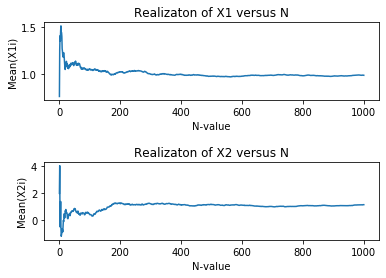

In [34]:
#6. Comparision of the coverage speed
N6 = 1000
x61 = np.random.uniform(0,2,N6)
x62 = np.random.normal(loc=1.0, scale=4.0, size= N6)
Exp1 = np.linspace(0,0,N6)
Exp2 = np.linspace(0,0,N6)
Width = np.linspace(1,N6,N6)
for i in range(N6):
    Exp1[i] = np.mean(x61[0:(i+1)])
    Exp2[i] = np.mean(x62[0:(i+1)])
#begin plotting
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('Realizaton of X1 versus N')
ax1.set_xlabel('N-value')
ax1.set_ylabel('Mean(X1i)')
plt.plot(Width, Exp1)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('Realizaton of X2 versus N')
ax2.set_xlabel('N-value')
ax2.set_ylabel('Mean(X2i)')
plt.plot(Width, Exp2)
plt.subplots_adjust(hspace=0.8)

print("X1: Uniform distribution coverages faster!")

As N increases, mean value fluctuates intensely. So it will not converge to u.


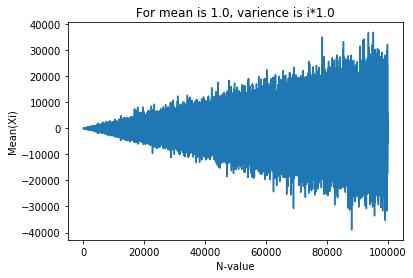

In [29]:
#7.
#use normal distribution as example(mean is 1.0, varience is i*1.0)
N7 = 100000
j7 = 1
N77 = 100
fig = plt.figure()
Width = np.linspace(1,N7,N7)
Array = np.array([])
for i in Width:
    Array = np.append(Array,np.mean(np.random.normal(loc=1.0, scale=i*1.0, size= N77)))
#begin plotting
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('For mean is 1.0, varience is i*1.0')
ax1.set_xlabel('N-value')
ax1.set_ylabel('Mean(Xi)')
plt.plot(Width, Array)
print("As N increases, mean value fluctuates intensely. So it will not converge to u.")